# Flowers recognition

In [1]:
# Ignore  the warnings
import warnings

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess.
from keras.preprocessing.image import ImageDataGenerator

# dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
# from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image


from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import linear_model



Using TensorFlow backend.


## Loading images

In [3]:
def read_data():
    X = list()
    y = list()
    IMG_SIZE = 128
    for i in os.listdir("./flowers/flowers/daisy"):
        try:
            path = "./flowers/flowers/daisy/"+i
            img = plt.imread(path)
            img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            X.append(img)
            y.append("daisy")
        except:
            None
    for i in os.listdir("./flowers/flowers/dandelion"):
        try:
            path = "./flowers/flowers/dandelion/"+i
            img = plt.imread(path)
            img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            X.append(img)
            y.append("dandelion")
        except:
            None
    for i in os.listdir("./flowers/flowers/rose"):
        try:
            path = "./flowers/flowers/rose/"+i
            img = plt.imread(path)
            img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            X.append(img)
            y.append("rose")
        except:
            None
    for i in os.listdir("./flowers/flowers/sunflower"):
        try:
            path = "./flowers/flowers/sunflower/"+i
            img = plt.imread(path)
            img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            X.append(img)
            y.append("sunflower")
        except:
            None
    for i in os.listdir("./flowers/flowers/tulip"):
        try:
            path = "./flowers/flowers/tulip/"+i
            img = plt.imread(path)
            img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            X.append(img)
            y.append("tulip")
        except:
            None

    X = np.array(X)
    
    return X, y

read_data()
print()



(array([[[[ 80, 101,  26],
          [ 83, 103,  32],
          [ 87, 107,  33],
          ...,
          [168, 159, 147],
          [166, 158, 139],
          [160, 154, 127]],
 
         [[ 76,  97,  18],
          [ 79, 100,  22],
          [ 84, 105,  27],
          ...,
          [166, 159, 144],
          [163, 157, 135],
          [156, 151, 121]],
 
         [[ 75,  94,  13],
          [ 78,  97,  16],
          [ 80, 102,  20],
          ...,
          [165, 158, 142],
          [163, 156, 137],
          [156, 151, 124]],
 
         ...,
 
         [[ 81,  99,  40],
          [ 85, 104,  43],
          [ 91, 110,  47],
          ...,
          [ 53,  80,  25],
          [ 56,  83,  24],
          [ 58,  84,  35]],
 
         [[ 80,  95,  37],
          [ 84, 102,  44],
          [ 88, 108,  47],
          ...,
          [ 55,  82,  31],
          [ 57,  85,  28],
          [ 59,  86,  35]],
 
         [[ 78,  93,  35],
          [ 81,  98,  43],
          [ 85, 106,  45],
   

In [4]:
X, y = read_data()

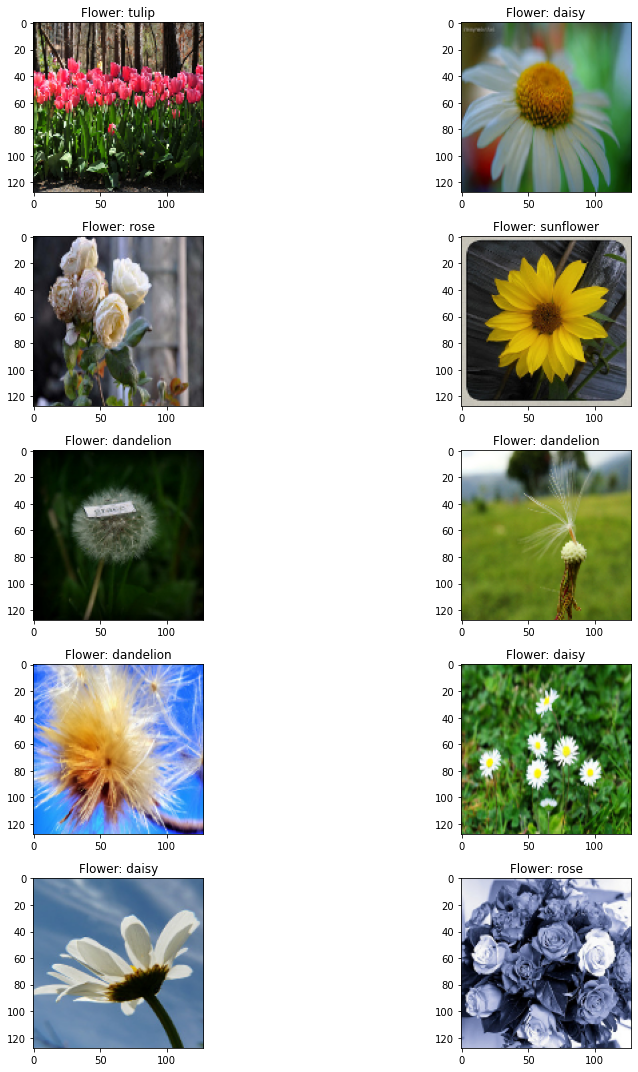

In [16]:
def plot_random(X, y):
    fig, ax = plt.subplots(5, 2)
    fig.set_size_inches(15, 15)
    for i in range(5):
        for j in range(2):
            l = rn.randint(0, len(y))
            ax[i, j].imshow(X[l])
            ax[i, j].set_title('Flower: ' + y[l])

    plt.tight_layout()
    plt.show()
    
plot_random(X,y)    
    

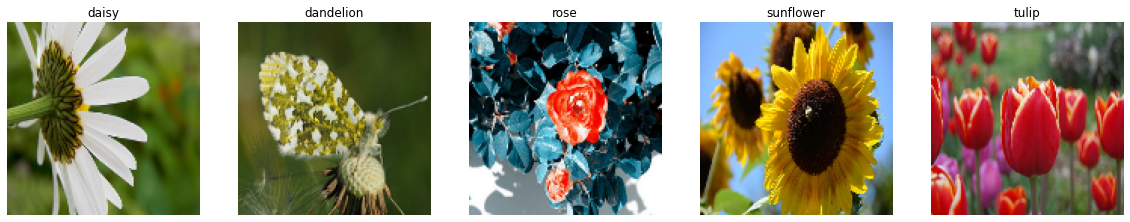

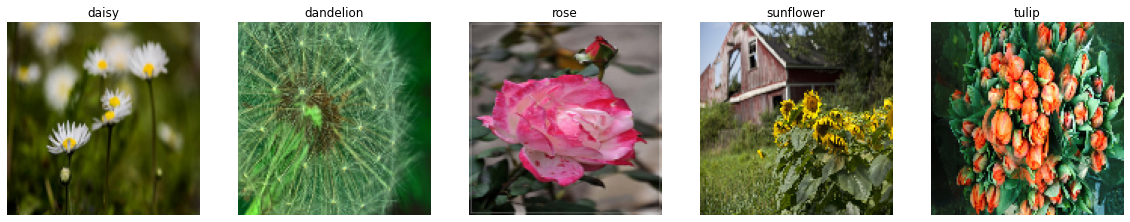

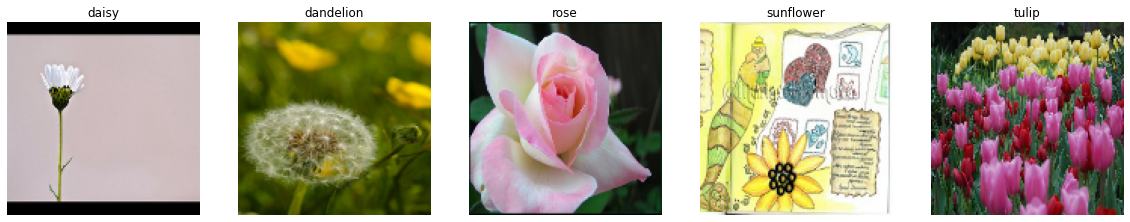

In [17]:
def plot_kind(X,y):
    
    for amount in range(3):
            plt.figure(figsize = (20,20))
            for i in range(5):
                img = X[950*i+amount]
                plt.subplot(1,5,i+1)
                plt.imshow(img)
                plt.axis("off")
                plt.title(y[950*i])
                
plot_kind(X,y)                


## Data processing

In [5]:
import random


def reprocess_data1(n_samples=-1):
    X, labels = read_data()
    if(n_samples!=-1):
        indexes = random.sample(range(1, len(X)), n_samples)
        X = [x for idx, x in enumerate(X) if idx in indexes]
        X = np.array(X)
        labels = [label for idx, label in enumerate(labels) if idx in indexes]

    label_dict = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

    y = [label_dict[labels[i]] for i in range(len(labels))]

    t_size = 0.15

    X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=t_size, random_state = 42)
    #1837
    
    if(n_samples!=-1):
        test_size = int(n_samples*t_size)

        X_valid, X_train = X_train_full[:test_size] / 255., X_train_full[test_size:] / 255.
        y_valid, y_train = y_train_full[:test_size], y_train_full[test_size:]
        X_test = X_test / 255.
    else:
        X_valid, X_train = X_train_full[:1837] / 255., X_train_full[1837:] / 255.
        y_valid, y_train = y_train_full[:1837], y_train_full[1837:]
        X_test = X_test / 255.
        
    return X_train, X_test, X_valid, y_train, y_test, y_valid



In [6]:
def reprocess_data2(n_samples=-1):
    X, labels = read_data()
    if(n_samples!=-1):
        indexes = random.sample(range(1, len(X)), n_samples)
        X = [x for idx, x in enumerate(X) if idx in indexes]
        X = np.array(X)
        labels = [label for idx, label in enumerate(labels) if idx in indexes]

    label_dict = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

    y = [label_dict[labels[i]] for i in range(len(labels))]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    X_train = X_train / 255.
    X_test = X_test / 255.

    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    X_train = X_train.reshape(X_train.shape[0], 128 * 128 * 3)
    X_test = X_test.reshape(X_test.shape[0], 128 * 128 * 3)

    return X_train, X_test, y_train, y_test

In [7]:
X_train1, X_test1, X_valid1, y_train1, y_test1, y_valid1 = reprocess_data1()

In [8]:
X_train1

array([[[[0.30196078, 0.54117647, 0.48235294],
         [0.30588235, 0.54509804, 0.49019608],
         [0.32941176, 0.56470588, 0.51764706],
         ...,
         [0.33333333, 0.4745098 , 0.14509804],
         [0.36862745, 0.52156863, 0.16470588],
         [0.38039216, 0.55294118, 0.18431373]],

        [[0.28235294, 0.50588235, 0.43529412],
         [0.2745098 , 0.48235294, 0.41568627],
         [0.27843137, 0.50588235, 0.43921569],
         ...,
         [0.34901961, 0.49019608, 0.15294118],
         [0.38431373, 0.52941176, 0.18431373],
         [0.39215686, 0.54901961, 0.18431373]],

        [[0.26666667, 0.4745098 , 0.39607843],
         [0.25098039, 0.45098039, 0.37647059],
         [0.24705882, 0.45882353, 0.37254902],
         ...,
         [0.36078431, 0.49803922, 0.16862745],
         [0.38039216, 0.52941176, 0.18039216],
         [0.39607843, 0.55294118, 0.18823529]],

        ...,

        [[0.50588235, 0.38039216, 0.42352941],
         [0.50980392, 0.38431373, 0.42745098]

In [9]:
X_test1

array([[[[0.39607843, 0.36470588, 0.35294118],
         [0.39607843, 0.36862745, 0.35686275],
         [0.38823529, 0.36862745, 0.35686275],
         ...,
         [0.36862745, 0.33333333, 0.29019608],
         [0.39607843, 0.35294118, 0.29411765],
         [0.34117647, 0.3254902 , 0.29803922]],

        [[0.37647059, 0.34509804, 0.3372549 ],
         [0.37254902, 0.35294118, 0.34117647],
         [0.38431373, 0.36470588, 0.34901961],
         ...,
         [0.35294118, 0.32156863, 0.26666667],
         [0.41568627, 0.38431373, 0.30980392],
         [0.37647059, 0.35686275, 0.30196078]],

        [[0.38823529, 0.36470588, 0.35294118],
         [0.38823529, 0.36470588, 0.36078431],
         [0.4       , 0.37647059, 0.35686275],
         ...,
         [0.38431373, 0.35686275, 0.3254902 ],
         [0.43529412, 0.39607843, 0.35294118],
         [0.4       , 0.36470588, 0.3254902 ]],

        ...,

        [[0.76862745, 0.76862745, 0.81568627],
         [0.78431373, 0.78431373, 0.83137255]

In [10]:
X_valid1

array([[[[0.05882353, 0.07843137, 0.        ],
         [0.0627451 , 0.08235294, 0.        ],
         [0.0627451 , 0.08235294, 0.        ],
         ...,
         [0.10588235, 0.13333333, 0.        ],
         [0.09803922, 0.1254902 , 0.        ],
         [0.10196078, 0.12941176, 0.        ]],

        [[0.0627451 , 0.0745098 , 0.00392157],
         [0.06666667, 0.07843137, 0.        ],
         [0.07058824, 0.08235294, 0.        ],
         ...,
         [0.10588235, 0.13333333, 0.        ],
         [0.10196078, 0.12941176, 0.        ],
         [0.10196078, 0.12941176, 0.        ]],

        [[0.06666667, 0.07843137, 0.        ],
         [0.07058824, 0.08235294, 0.        ],
         [0.07843137, 0.09019608, 0.00392157],
         ...,
         [0.10196078, 0.12941176, 0.        ],
         [0.10196078, 0.12941176, 0.        ],
         [0.10196078, 0.12941176, 0.        ]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]

In [11]:
y_train1

[2,
 0,
 0,
 1,
 3,
 2,
 4,
 0,
 4,
 2,
 3,
 1,
 1,
 0,
 0,
 4,
 4,
 2,
 1,
 3,
 4,
 1,
 1,
 1,
 1,
 4,
 2,
 3,
 4,
 1,
 1,
 4,
 4,
 0,
 4,
 2,
 0,
 4,
 1,
 1,
 1,
 3,
 1,
 4,
 1,
 3,
 4,
 4,
 4,
 0,
 1,
 3,
 4,
 2,
 2,
 1,
 4,
 4,
 2,
 2,
 1,
 3,
 3,
 0,
 3,
 0,
 4,
 2,
 2,
 4,
 0,
 1,
 4,
 1,
 4,
 4,
 3,
 1,
 0,
 4,
 4,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 3,
 2,
 1,
 1,
 0,
 2,
 0,
 3,
 4,
 2,
 4,
 3,
 1,
 4,
 1,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 4,
 4,
 0,
 2,
 1,
 4,
 0,
 4,
 4,
 4,
 3,
 4,
 4,
 1,
 1,
 2,
 3,
 1,
 3,
 2,
 2,
 2,
 4,
 1,
 3,
 4,
 4,
 2,
 2,
 1,
 4,
 2,
 2,
 3,
 2,
 4,
 1,
 3,
 1,
 1,
 1,
 4,
 0,
 1,
 3,
 1,
 1,
 2,
 0,
 1,
 1,
 3,
 1,
 1,
 0,
 1,
 3,
 0,
 1,
 4,
 4,
 4,
 4,
 1,
 1,
 1,
 2,
 0,
 3,
 2,
 1,
 1,
 0,
 0,
 3,
 4,
 1,
 2,
 4,
 1,
 1,
 2,
 1,
 1,
 3,
 0,
 1,
 2,
 3,
 2,
 3,
 4,
 1,
 4,
 1,
 4,
 3,
 1,
 1,
 1,
 3,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 3,
 3,
 2,
 3,
 4,
 2,
 1,
 0,
 3,
 4,
 0,
 0,
 0,
 4,
 0,
 3,
 2,
 3,
 1,
 2,
 3,
 4,
 0,
 3,
 0,
 2,
 4,
 1,


In [12]:
y_test1

[1,
 1,
 1,
 4,
 2,
 4,
 0,
 1,
 1,
 2,
 3,
 4,
 3,
 1,
 4,
 1,
 4,
 1,
 4,
 2,
 0,
 0,
 3,
 4,
 0,
 0,
 0,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 4,
 2,
 2,
 4,
 1,
 3,
 0,
 2,
 2,
 3,
 3,
 1,
 0,
 4,
 4,
 3,
 1,
 0,
 0,
 2,
 1,
 3,
 0,
 1,
 4,
 4,
 0,
 2,
 0,
 3,
 0,
 3,
 0,
 4,
 3,
 4,
 2,
 1,
 2,
 4,
 4,
 0,
 0,
 1,
 1,
 1,
 4,
 1,
 3,
 4,
 1,
 3,
 4,
 4,
 4,
 3,
 2,
 4,
 4,
 1,
 4,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 4,
 2,
 1,
 4,
 0,
 1,
 1,
 1,
 1,
 4,
 1,
 0,
 3,
 1,
 0,
 4,
 0,
 3,
 4,
 4,
 3,
 1,
 0,
 4,
 4,
 1,
 2,
 3,
 1,
 4,
 1,
 4,
 3,
 2,
 3,
 3,
 4,
 2,
 1,
 3,
 0,
 4,
 3,
 4,
 0,
 1,
 4,
 1,
 0,
 1,
 4,
 2,
 1,
 1,
 1,
 3,
 0,
 2,
 0,
 3,
 3,
 0,
 0,
 1,
 4,
 0,
 3,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 4,
 3,
 4,
 4,
 1,
 3,
 3,
 2,
 0,
 4,
 4,
 0,
 0,
 0,
 2,
 4,
 2,
 4,
 0,
 2,
 3,
 3,
 3,
 3,
 1,
 0,
 1,
 0,
 3,
 0,
 0,
 2,
 1,
 4,
 1,
 0,
 4,
 0,
 1,
 1,
 1,
 3,
 0,
 1,
 4,
 3,
 1,
 0,
 4,
 2,
 0,
 3,
 1,
 1,
 1,
 4,
 0,
 1,
 1,
 0,
 3,
 1,
 3,
 1,
 0,
 1,
 1,


In [13]:
y_valid1

[1,
 0,
 2,
 2,
 1,
 1,
 3,
 0,
 0,
 1,
 0,
 4,
 2,
 3,
 4,
 2,
 1,
 2,
 2,
 2,
 0,
 3,
 3,
 2,
 1,
 0,
 2,
 3,
 4,
 3,
 0,
 4,
 4,
 4,
 4,
 3,
 4,
 2,
 4,
 0,
 0,
 4,
 4,
 3,
 3,
 1,
 1,
 4,
 0,
 0,
 1,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 3,
 4,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 3,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 4,
 1,
 0,
 1,
 1,
 1,
 4,
 0,
 1,
 4,
 3,
 3,
 1,
 1,
 0,
 1,
 1,
 3,
 4,
 4,
 0,
 2,
 4,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 3,
 0,
 3,
 1,
 3,
 1,
 1,
 4,
 1,
 0,
 1,
 3,
 1,
 2,
 0,
 0,
 1,
 4,
 1,
 2,
 0,
 2,
 4,
 4,
 3,
 1,
 2,
 0,
 2,
 2,
 4,
 2,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 3,
 1,
 0,
 4,
 2,
 1,
 4,
 4,
 1,
 1,
 3,
 3,
 3,
 2,
 3,
 2,
 0,
 2,
 4,
 3,
 4,
 1,
 1,
 1,
 2,
 3,
 0,
 4,
 2,
 0,
 2,
 1,
 1,
 2,
 4,
 2,
 2,
 2,
 3,
 1,
 2,
 4,
 4,
 4,
 0,
 1,
 1,
 0,
 2,
 3,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 4,
 0,
 4,
 3,
 4,
 4,
 2,
 4,
 4,
 1,
 2,
 2,
 3,
 3,
 4,
 4,
 0,
 1,
 2,
 4,
 4,
 0,
 4,
 1,
 1,
 2,
 1,
 3,
 0,
 2,
 4,
 2,
 2,
 0,
 4,
 0,
 1,
 4,


<BarContainer object of 5 artists>

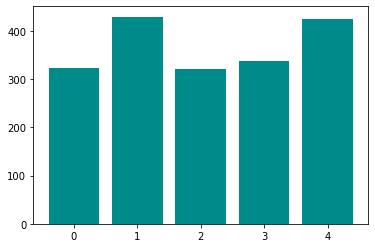

In [21]:
from collections import Counter
classes_train1 = Counter(y_train1)
plt.bar(classes_train1.keys(), classes_train1.values(), color="darkcyan")


<BarContainer object of 5 artists>

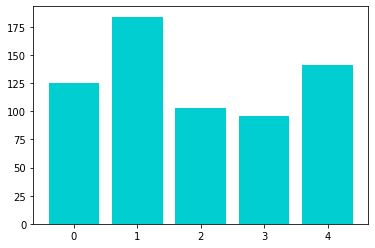

In [22]:
classes_test1 = Counter(y_test1)
plt.bar(classes_test1.keys(), classes_test1.values(), color="darkturquoise")

<BarContainer object of 5 artists>

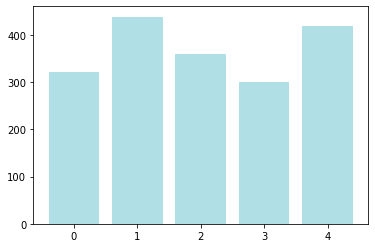

In [23]:
classes_valid1 = Counter(y_valid1)
plt.bar(classes_valid1.keys(), classes_valid1.values(), color="powderblue")

In [14]:
X_train2, X_test2,y_train2, y_test2= reprocess_data2()

In [15]:
X_train2

array([[0.05882353, 0.07843137, 0.        , ..., 0.00784314, 0.00784314,
        0.        ],
       [0.36862745, 0.56078431, 0.87058824, ..., 0.34509804, 0.5372549 ,
        0.81960784],
       [0.03921569, 0.02745098, 0.00784314, ..., 0.00784314, 0.00784314,
        0.00784314],
       ...,
       [0.78039216, 0.89803922, 0.92941176, ..., 0.27058824, 0.43921569,
        0.14901961],
       [0.4       , 0.34509804, 0.15294118, ..., 0.31764706, 0.34509804,
        0.18039216],
       [0.7372549 , 0.75294118, 0.85098039, ..., 0.        , 0.1254902 ,
        0.26666667]])

In [16]:
X_test2

array([[0.39607843, 0.36470588, 0.35294118, ..., 0.37254902, 0.3254902 ,
        0.27058824],
       [0.02745098, 0.03137255, 0.00784314, ..., 0.14901961, 0.12156863,
        0.        ],
       [0.04313725, 0.08627451, 0.03137255, ..., 0.21568627, 0.30980392,
        0.07843137],
       ...,
       [0.08235294, 0.14509804, 0.00392157, ..., 0.33333333, 0.41176471,
        0.18039216],
       [0.32156863, 0.20784314, 0.0745098 , ..., 0.        , 0.        ,
        0.        ],
       [0.14509804, 0.25882353, 0.1372549 , ..., 0.07843137, 0.12941176,
        0.05882353]])

In [17]:
y_train2

array([1, 0, 2, ..., 3, 4, 1])

In [18]:
y_test2

array([1, 1, 1, 4, 2, 4, 0, 1, 1, 2, 3, 4, 3, 1, 4, 1, 4, 1, 4, 2, 0, 0,
       3, 4, 0, 0, 0, 1, 1, 2, 4, 1, 1, 1, 4, 1, 1, 1, 4, 2, 2, 4, 1, 3,
       0, 2, 2, 3, 3, 1, 0, 4, 4, 3, 1, 0, 0, 2, 1, 3, 0, 1, 4, 4, 0, 2,
       0, 3, 0, 3, 0, 4, 3, 4, 2, 1, 2, 4, 4, 0, 0, 1, 1, 1, 4, 1, 3, 4,
       1, 3, 4, 4, 4, 3, 2, 4, 4, 1, 4, 2, 1, 0, 0, 1, 2, 2, 4, 2, 1, 4,
       0, 1, 1, 1, 1, 4, 1, 0, 3, 1, 0, 4, 0, 3, 4, 4, 3, 1, 0, 4, 4, 1,
       2, 3, 1, 4, 1, 4, 3, 2, 3, 3, 4, 2, 1, 3, 0, 4, 3, 4, 0, 1, 4, 1,
       0, 1, 4, 2, 1, 1, 1, 3, 0, 2, 0, 3, 3, 0, 0, 1, 4, 0, 3, 0, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 4, 3, 4, 4, 1, 3, 3, 2, 0, 4, 4, 0, 0, 0, 2,
       4, 2, 4, 0, 2, 3, 3, 3, 3, 1, 0, 1, 0, 3, 0, 0, 2, 1, 4, 1, 0, 4,
       0, 1, 1, 1, 3, 0, 1, 4, 3, 1, 0, 4, 2, 0, 3, 1, 1, 1, 4, 0, 1, 1,
       0, 3, 1, 3, 1, 0, 1, 1, 2, 2, 1, 1, 4, 2, 3, 0, 4, 1, 3, 0, 0, 0,
       3, 2, 2, 2, 4, 2, 3, 1, 2, 1, 4, 3, 3, 0, 0, 2, 0, 4, 1, 1, 2, 0,
       0, 3, 1, 3, 1, 2, 3, 3, 2, 3, 1, 4, 0, 2, 4,

<BarContainer object of 5 artists>

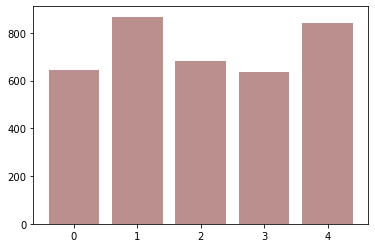

In [25]:
classes_train2 = Counter(y_train2)
plt.bar(classes_train2.keys(), classes_train2.values(), color='rosybrown')

<BarContainer object of 5 artists>

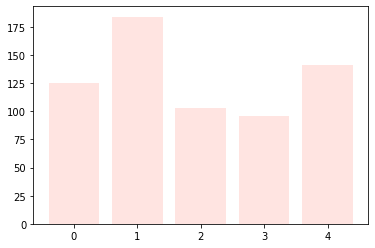

In [26]:
classes_test2 = Counter(y_test2)
plt.bar(classes_test2.keys(), classes_test2.values(), color='mistyrose')

## Simple models

In [21]:
from random import uniform

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import linear_model


def logistic(X_train, X_test, y_train, y_test):

    kfold = StratifiedKFold(n_splits=5, shuffle=False)

    pipe = Pipeline([
        ('preprocessing', StandardScaler()),
        ('classifier', linear_model.LogisticRegression(C=1, solver='newton-cg'))])

        
    param_grid = {'preprocessing': [MinMaxScaler(), StandardScaler(), None],
#         'classifier__C': [0.001, 0.01]
         'classifier__C': [0.01]
        
    }

    grid = GridSearchCV(pipe, param_grid, cv=kfold, error_score='raise')

    grid.fit(X_train, y_train)
    print(grid.best_params_)

    grid.fit(X_train, y_train)

#     y_pred = grid.predict(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return grid

# X_train, X_test, y_train, y_test = reprocess_data2()

# logistic(X_train, X_test, X_valid, y_train, y_test, y_valid)
#0.43605546995377503


In [29]:
from random import uniform

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC


def svm_linear(X_train, X_test, y_train, y_test):

    kfold = StratifiedKFold(n_splits=5, shuffle=False)

    pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='linear'))])

    param_grid = {
        'preprocessing' : [MinMaxScaler(), StandardScaler(), None],
        'classifier__C': [0.001],
        'classifier__gamma': [0.01]
    }

    grid = GridSearchCV(pipe, param_grid, cv=kfold, error_score='raise')

    grid.fit(X_train, y_train)
    print(grid.best_params_)

    grid.fit(X_train, y_train)

#     y_pred = grid.predict(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return grid



# X_train, X_test, X_valid, y_train, y_test, y_valid = reprocess_data()
# svm_linear(X_train, X_test, X_valid, y_train, y_test, y_valid)
#0.4560862865947612


In [30]:
from random import uniform

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC


def svm_poly(X_train, X_test, y_train, y_test):

    kfold = StratifiedKFold(n_splits=5, shuffle=False)

    pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='poly'))])
        
    param_grid = {
        'classifier__C': [0.001],
        'classifier__gamma': [0.01]
    }

    grid = GridSearchCV(pipe, param_grid, cv=kfold, error_score='raise')

    grid.fit(X_train, y_train)
    print(grid.best_params_)

    grid.fit(X_train, y_train)

#     y_pred = grid.predict(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return grid

In [31]:
from random import uniform

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC


def svm_rbf(X_train, X_test, y_train, y_test):

    kfold = StratifiedKFold(n_splits=5, shuffle=False)

    pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='rbf'))])

        
    param_grid = {'preprocessing': [MinMaxScaler(), StandardScaler(), None],
        'classifier__C': [0.001],
        'classifier__gamma': [0.01]
    }

    grid = GridSearchCV(pipe, param_grid, cv=kfold, error_score='raise')

    grid.fit(X_train, y_train)
    print(grid.best_params_)

    grid.fit(X_train, y_train)

#     y_pred = grid.predict(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return grid

In [32]:
from random import uniform

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



def random_forest(X_train, X_test, y_train, y_test):
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    # X_train = X_train.reshape(1837,128*128*3)
    # X_test = X_test.reshape(649,128*128*3)

    # rf1 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

    kfold = StratifiedKFold(n_splits=5, shuffle=False)


    param_grid = {
        'n_estimators': [5, 50, 500],
        'max_leaf_nodes': [2,16]

    }

    rf1 = GridSearchCV(RandomForestClassifier(), param_grid, cv=kfold, error_score='raise')

    rf1.fit(X_train, y_train)

#     y_pred = rf1.predict(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return rf1



# X_train, X_test, X_valid, y_train, y_test, y_valid = reprocess_data()
# rf(X_train, X_test, X_valid, y_train, y_test, y_valid)
#0.4884437596302003



In [33]:
from random import uniform

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC


def knn(X_train, X_test, y_train, y_test):

    kfold = StratifiedKFold(n_splits=5, shuffle=False)

    pipe = Pipeline([('preprocessing', StandardScaler()),
                       ('classifier', KNeighborsClassifier())])

        
    param_grid = {'preprocessing': [MinMaxScaler(), StandardScaler(), None],
        'classifier__n_neighbors': [1, 2, 3, 5, 10]}


    grid = GridSearchCV(pipe, param_grid, cv=kfold, error_score='raise')

    grid.fit(X_train, y_train)
    print(grid.best_params_)

#     y_pred = grid.predict(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return grid



# X_train, X_test, X_valid, y_train, y_test, y_valid = reprocess_data()
# svm_linear(X_train, X_test, X_valid, y_train, y_test, y_valid)
#0.4560862865947612


In [34]:
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC


def dec_tree(X_train, X_test, y_train, y_test):

    kfold = StratifiedKFold(n_splits=5, shuffle=False)

    pipe = Pipeline([('preprocessing', StandardScaler()),
                       ('classifier', DecisionTreeClassifier(random_state=0))])

    param_grid = {'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__max_depth': [1, 2, 5, 10, 100],
    'classifier__min_samples_leaf': [1, 2, 4, 10]}


    grid = GridSearchCV(pipe, param_grid, cv=kfold, error_score='raise')

    grid.fit(X_train, y_train)
    print(grid.best_params_)

#     y_pred = grid.predict(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return grid


In [35]:
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC


def extra_tree(X_train, X_test, y_train, y_test):

    kfold = StratifiedKFold(n_splits=5, shuffle=False)

    pipe = Pipeline([('preprocessing', StandardScaler()),
                       ('classifier', ExtraTreesClassifier(n_jobs=-1, random_state=42))])

    param_grid = {'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_estimators': [50, 100, 500, 1000],
    'classifier__max_leaf_nodes': [4, 8, 16, 64]}


    grid = GridSearchCV(pipe, param_grid, cv=kfold, error_score='raise')

    grid.fit(X_train, y_train)
    print(grid.best_params_)

#     y_pred = grid.predict(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return grid

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

def ada(X_train, X_test, y_train, y_test):

    kfold = StratifiedKFold(n_splits=5, shuffle=False)

    pipe = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', AdaBoostClassifier(
                       DecisionTreeClassifier(random_state=42),
                       n_estimators=500,
                       learning_rate=0.5))])

    param_grid = {'classifier__n_estimators': [10,50,100],
              'classifier__learning_rate': [0.1, 0.2, 0.3,0.5,0.6,0.7,0.8,0.9]}


    grid = GridSearchCV(pipe, param_grid, cv=kfold, error_score='raise')

    grid.fit(X_train, y_train)
    print(grid.best_params_)

#     y_pred = grid.predict(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return grid

## Simple models - comparison

In [37]:
from sklearn import  metrics
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = reprocess_data2(300)
log = logistic(X_train, X_test, y_train, y_test)
svm_l = svm_linear(X_train, X_test, y_train, y_test)
svm_p = svm_poly(X_train, X_test, y_train, y_test)
svm_r = svm_rbf(X_train, X_test, y_train, y_test)
rf = random_forest(X_train, X_test, y_train, y_test)
knn = knn(X_train, X_test, y_train, y_test)
dec = dec_tree(X_train, X_test, y_train, y_test)
extr = extra_tree(X_train, X_test, y_train, y_test)
ad = ada(X_train, X_test, y_train, y_test)

models = []
models.append(('LR', log.best_estimator_))
models.append(('SVC linear', svm_l.best_estimator_))
models.append(('SVC poly', svm_p.best_estimator_))
models.append(('SVC rbf', svm_r.best_estimator_))
models.append(('RandomForest', rf.best_estimator_))
models.append(('KNeighbours', knn.best_estimator_))
models.append(('DecisionTree', dec.best_estimator_))
models.append(('ExtraTrees', extr.best_estimator_))
models.append(('AdaBoost', ad.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    y_pred = model.predict(X_test)
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, y_pred, average='micro')))
    print("recall_score: {}".format(metrics.recall_score(y_test, y_pred, average='micro')))
    print("f1_score: {}".format(metrics.f1_score(y_test, y_pred, average='micro')))
    print("accuracy_score: {}".format(metrics.accuracy_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))
    precision_score.append(metrics.precision_score(y_test, y_pred, average='micro'))
    recall_score.append(metrics.recall_score(y_test, y_pred, average='micro'))
    f1_score.append(metrics.f1_score(y_test, y_pred, average='micro'))
    accuracy_score.append(metrics.accuracy_score(y_test, y_pred))



{'classifier__C': 0.01, 'preprocessing': MinMaxScaler()}
{'classifier__C': 0.001, 'classifier__gamma': 0.01, 'preprocessing': MinMaxScaler()}
{'classifier__C': 0.001, 'classifier__gamma': 0.01}
{'classifier__C': 0.001, 'classifier__gamma': 0.01, 'preprocessing': MinMaxScaler()}
{'classifier__n_neighbors': 1, 'preprocessing': None}
{'classifier__max_depth': 2, 'classifier__min_samples_leaf': 1, 'preprocessing': MinMaxScaler()}
{'classifier__max_leaf_nodes': 64, 'classifier__n_estimators': 100, 'preprocessing': MinMaxScaler()}
{'classifier__learning_rate': 0.3, 'classifier__n_estimators': 100}
LR
precision_score: 0.35555555555555557
recall_score: 0.35555555555555557
f1_score: 0.35555555555555557
accuracy_score: 0.35555555555555557
[[3 4 1 1 0]
 [5 5 0 0 2]
 [0 2 2 0 2]
 [1 2 0 4 1]
 [1 2 3 2 2]]
SVC linear
precision_score: 0.35555555555555557
recall_score: 0.35555555555555557
f1_score: 0.35555555555555557
accuracy_score: 0.35555555555555557
[[2 4 2 0 1]
 [3 6 1 0 2]
 [1 2 2 0 1]
 [0 2 0 

In [38]:
import pandas as pd
d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score}
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LR', 'SVC linear', 'SVC poly', 'SVC rbf', 'Random Forest', 'KNeighbours', 'DecisionTree', 'ExtraTrees', 'AdaBoost'])
print(df)


          Method  precision_score  recall_score  f1_score  accuracy_score
0             LR         0.355556      0.355556  0.355556        0.355556
1     SVC linear         0.355556      0.355556  0.355556        0.355556
2       SVC poly         0.222222      0.222222  0.222222        0.222222
3        SVC rbf         0.266667      0.266667  0.266667        0.266667
4  Random Forest         0.244444      0.244444  0.244444        0.244444
5    KNeighbours         0.333333      0.333333  0.333333        0.333333
6   DecisionTree         0.355556      0.355556  0.355556        0.355556
7     ExtraTrees         0.311111      0.311111  0.311111        0.311111
8       AdaBoost         0.244444      0.244444  0.244444        0.244444


1


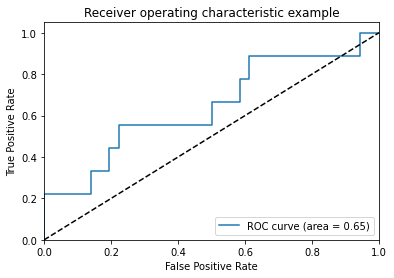

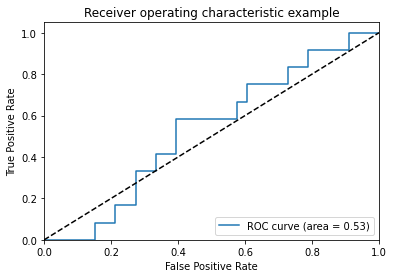

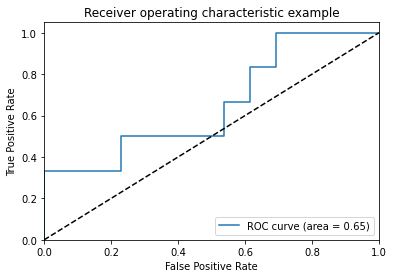

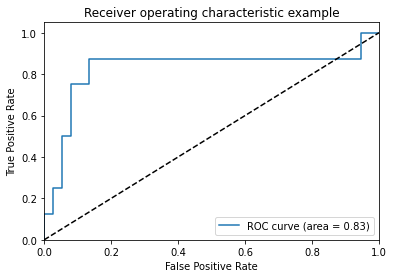

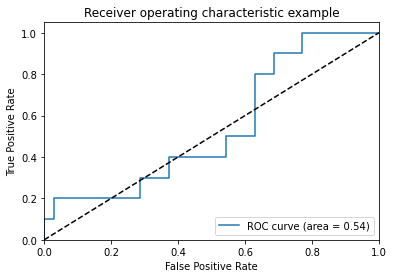

2


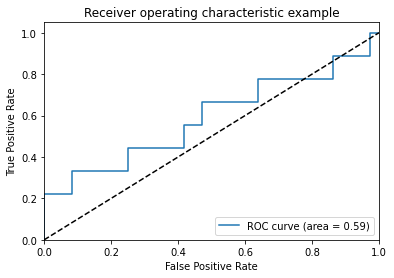

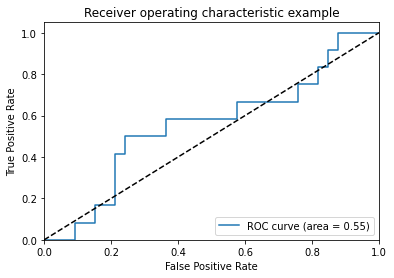

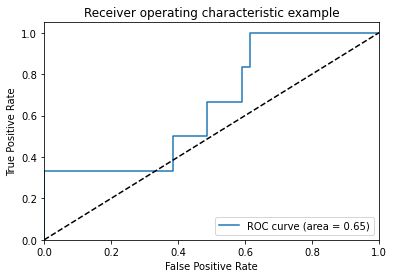

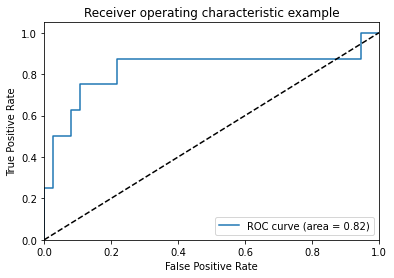

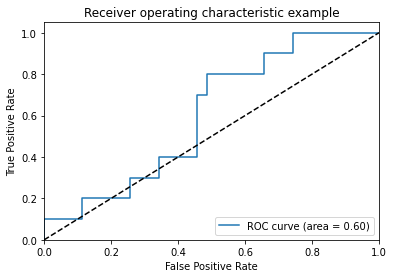

In [58]:
from sklearn.metrics import roc_curve, auc

num = 1
for mod in (log, svm_l):
    print(num)
    y_score = mod.fit(X_train, y_train).decision_function(X_test)
    n_classes=5
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
        
    num = num + 1   


In [ ]:
X_train_full_s, X_test_full_s, y_train_full_s, y_test_full_s = reprocess_data2()
log_full = logistic(X_train_full_s, X_test_full_s, y_train_full_s, y_test_full_s)

## Neural network models

In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import History
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import  metrics
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Flatten


In [85]:
def model1(X_train, X_test, X_valid, y_train, y_test, y_valid):

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_valid = np.array(y_valid)


    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(128, 128, 3)),
        keras.layers.Dense(1024, activation="relu"),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(5, activation="softmax")
    ])

    model.summary()


    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="Adam",
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=30,
                        validation_data=(X_valid, y_valid))

#     pd.DataFrame(history.history).plot(figsize=(8, 5))
#     plt.grid(True)
#     plt.gca().set_ylim(0, 1)
#     plt.show()

#     y_pred = model.predict_classes(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return model, history

In [86]:
def model2(X_train, X_test, X_valid, y_train, y_test, y_valid):

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_valid = np.array(y_valid)


    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(128, 128, 3)),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("sigmoid"),
        keras.layers.Dense(1024, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("sigmoid"),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("sigmoid"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("sigmoid"),
        keras.layers.Dense(5, activation="softmax")
    ])


    model.summary()


    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="Adam",
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=30,
                        validation_data=(X_valid, y_valid))

#     pd.DataFrame(history.history).plot(figsize=(8, 5))
#     plt.grid(True)
#     plt.gca().set_ylim(0, 1)
#     plt.show()

#     y_pred = model.predict_classes(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return model, history

In [87]:
def model3(X_train, X_test, X_valid, y_train, y_test, y_valid):

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_valid = np.array(y_valid)


    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    model = keras.models.Sequential([
        keras.layers.Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (128,128,3)),
        keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Flatten(),
        keras.layers.Dense(1024, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(5, activation="softmax")
    ])


    model.summary()


    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="Adam",
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=30,
                        validation_data=(X_valid, y_valid))

#     pd.DataFrame(history.history).plot(figsize=(8, 5))
#     plt.grid(True)
#     plt.gca().set_ylim(0, 1)
#     plt.show()

#     y_pred = model.predict_classes(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return model, history

In [88]:
def model4(X_train, X_test, X_valid, y_train, y_test, y_valid):

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_valid = np.array(y_valid)


    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape = (128,128,3), padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(16, (2, 2), padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(5,activation="softmax"))

    model.summary()


    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="Adam",
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=30,
                        validation_data=(X_valid, y_valid))

#     pd.DataFrame(history.history).plot(figsize=(8, 5))
#     plt.grid(True)
#     plt.gca().set_ylim(0, 1)
#     plt.show()

#     y_pred = model.predict_classes(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return model, history

In [59]:
def model5(X_train, X_test, X_valid, y_train, y_test, y_valid):

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_valid = np.array(y_valid)


    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(5, activation="softmax"))
    model.summary()

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="Adam",
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=30,
                        validation_data=(X_valid, y_valid))

#     pd.DataFrame(history.history).plot(figsize=(8, 5))
#     plt.grid(True)
#     plt.gca().set_ylim(0, 1)
#     plt.show()

#     y_pred = model.predict_classes(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return model, history

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import  metrics
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Flatten


def model6(X_train, X_test, X_valid, y_train, y_test, y_valid):

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_valid = np.array(y_valid)


    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    model.summary()

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="Adam",
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=30,
                        validation_data=(X_valid, y_valid))

#     pd.DataFrame(history.history).plot(figsize=(8, 5))
#     plt.grid(True)
#     plt.gca().set_ylim(0, 1)
#     plt.show()

#     y_pred = model.predict_classes(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return model, history

In [70]:

def model7(X_train, X_test, X_valid, y_train, y_test, y_valid):

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_valid = np.array(y_valid)


    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(5, activation="softmax"))

    model.summary()  
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

    # model.compile(loss="sparse_categorical_crossentropy",
    #               optimizer="Adam",
    #               metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=30,
                        validation_data=(X_valid, y_valid))

#     pd.DataFrame(history.history).plot(figsize=(8, 5))
#     plt.grid(True)
#     plt.gca().set_ylim(0, 1)
#     plt.show()

#     y_pred = model.predict_classes(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return model, history



In [71]:
from keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D


def model8(X_train, X_test, X_valid, y_train, y_test, y_valid):

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_valid = np.array(y_valid)


    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    model = Sequential()

    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu", input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="Same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="Same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="Same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="Same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(5, activation="softmax"))

    model.summary()  

    # adam = tf.keras.optimizers.Adam(lr=0.0001)

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

    # model.compile(loss="sparse_categorical_crossentropy",
    #               optimizer="Adam",
    #               metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=30,
                        validation_data=(X_valid, y_valid))

#     pd.DataFrame(history.history).plot(figsize=(8, 5))
#     plt.grid(True)
#     plt.gca().set_ylim(0, 1)
#     plt.show()

#     y_pred = model.predict_classes(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return model, history



In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import  metrics
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Flatten


def model9(X_train, X_test, X_valid, y_train, y_test, y_valid):

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_valid = np.array(y_valid)


    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    model = Sequential()
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu", input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="Same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="Same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="Same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dense(512))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dense(5, activation="softmax"))

    model.summary()  

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

    history = model.fit(X_train, y_train, epochs=30,
                        validation_data=(X_valid, y_valid))

#     pd.DataFrame(history.history).plot(figsize=(8, 5))
#     plt.grid(True)
#     plt.gca().set_ylim(0, 1)
#     plt.show()

#     y_pred = model.predict_classes(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return model, history

In [73]:
def model10(X_train, X_test, X_valid, y_train, y_test, y_valid):

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_valid = np.array(y_valid)


    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="Same", activation="relu", input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="Same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="Same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="Same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="Same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dense(5, activation="softmax"))

    model.summary() 

    adam = tf.keras.optimizers.Adam(lr=0.01)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 

    history = model.fit(X_train, y_train, epochs=30,
                        validation_data=(X_valid, y_valid))

#     pd.DataFrame(history.history).plot(figsize=(8, 5))
#     plt.grid(True)
#     plt.gca().set_ylim(0, 1)
#     plt.show()

#     y_pred = model.predict_classes(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(accuracy)

    return model, history


In [60]:
def plot_stat(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

In [61]:
def count_accuracy(model):    
    y_pred = model.predict_classes(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

In [65]:
X_train, X_test, X_valid, y_train, y_test, y_valid = reprocess_data1(300)


In [90]:
print('MODEL1:')
m1, history1 = model1(X_train, X_test, X_valid, y_train, y_test, y_valid)

MODEL1:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              50332672  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 50,860,037
Trainable params: 50,860,037
Non-trainable params: 0
_________________________________________________________________
Train on 210 samples, validate on 45 samples
Epoch 1/30
210/210 [==============================] - 7s 32ms/sample - loss: 73.7549 - accuracy: 0.2143 - val_loss: 37.4478 - val_accuracy: 0.2667
Epoch 2/30
210/210 [======================

0.3333333333333333


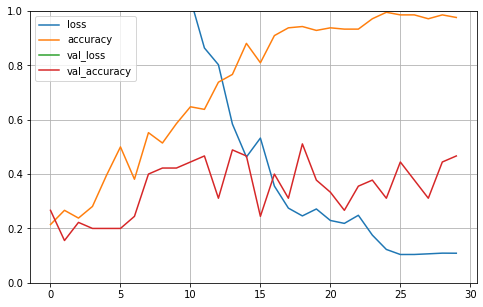

In [91]:
accuracy1 = count_accuracy(m1)
print(accuracy1)
plot_stat(history1)

In [92]:
print('MODEL2:')
m2, history2 = model2(X_train, X_test, X_valid, y_train, y_test, y_valid)

MODEL2:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 49152)             196608    
_________________________________________________________________
activation (Activation)      (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              50332672  
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)        

0.37777777777777777


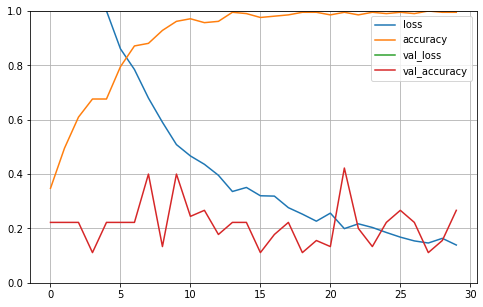

In [94]:
accuracy2 = count_accuracy(m2)
print(accuracy2)
plot_stat(history2)

In [95]:
print('MODEL3:')
m3, history3 = model3(X_train, X_test, X_valid, y_train, y_test, y_valid)

MODEL3:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              268436480 
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)       

0.24444444444444444


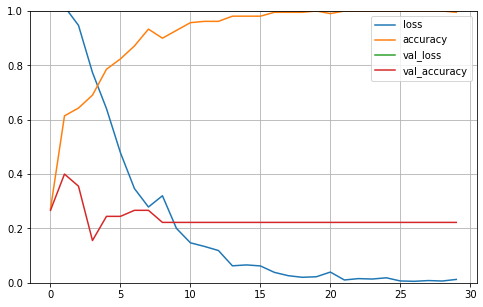

In [96]:
accuracy3 = count_accuracy(m3)
print(accuracy3)
plot_stat(history3)

In [ ]:
print('MODEL4:')
m4, history4 = model4(X_train, X_test, X_valid, y_train, y_test, y_valid)

In [ ]:
accuracy4 = count_accuracy(m4)
print(accuracy4)
plot_stat(history4)

In [66]:
print('MODEL5:')
m5, history5 = model5(X_train, X_test, X_valid, y_train, y_test, y_valid)

MODEL5:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96) 

0.4444444444444444


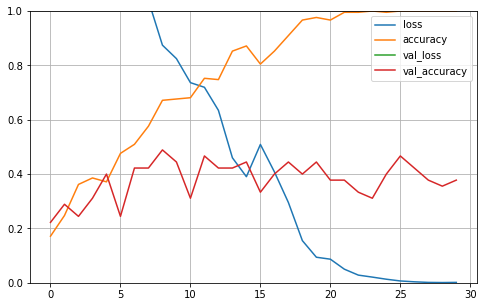

In [67]:
accuracy5 = count_accuracy(m5)
print(accuracy5)
plot_stat(history5)

In [74]:
print('MODEL6:')
m6, history6 = model6(X_train, X_test, X_valid, y_train, y_test, y_valid)


MODEL6:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)      

0.4666666666666667


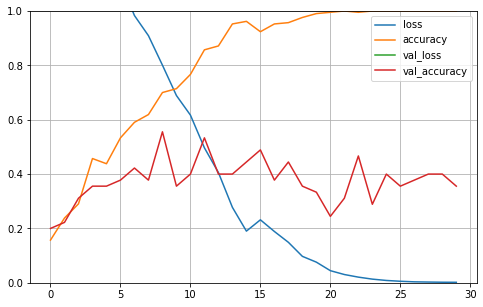

In [75]:
accuracy6 = count_accuracy(m6)
print(accuracy6)
plot_stat(history6)

In [76]:
print('MODEL7:')
m7, history7 = model7(X_train, X_test, X_valid, y_train, y_test, y_valid)


MODEL7:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96) 

0.4444444444444444


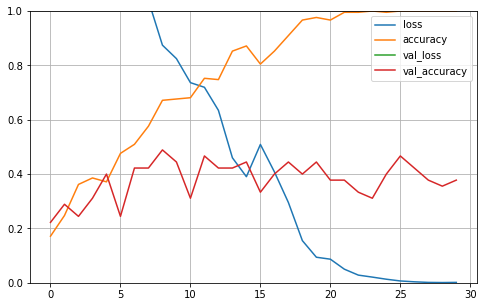

In [77]:
accuracy7 = count_accuracy(m7)
print(accuracy7)
plot_stat(history7)

In [78]:
print('MODEL8:')
m8, history8 = model8(X_train, X_test, X_valid, y_train, y_test, y_valid)


MODEL8:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)

0.28888888888888886


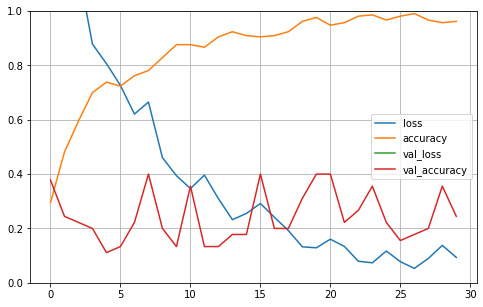

In [79]:
accuracy8 = count_accuracy(m8)
print(accuracy8)
plot_stat(history8)

In [80]:
print('MODEL9:')
m9, history9 = model9(X_train, X_test, X_valid, y_train, y_test, y_valid)


MODEL9:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)

0.2


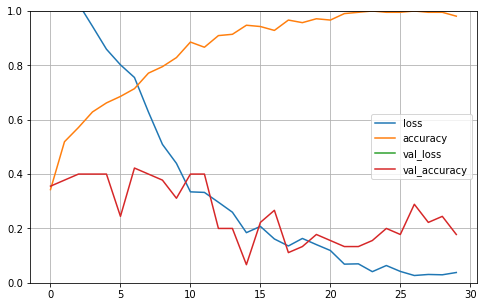

In [81]:
accuracy9 = count_accuracy(m9)
print(accuracy9)
plot_stat(history9)

In [82]:
print('MODEL10:')
m10, history10 = model10(X_train, X_test, X_valid, y_train, y_test, y_valid)


MODEL10:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 16)        64        
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)

0.37777777777777777


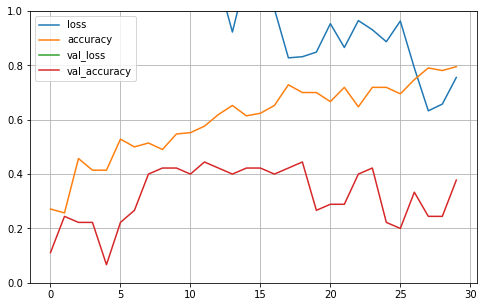

In [83]:
accuracy10 = count_accuracy(m10)
print(accuracy10)
plot_stat(history10)

## Neutral network models - comparison

In [97]:
# m5 = model5(X_train, X_test, X_valid, y_train, y_test, y_valid)
# m6 = model6(X_train, X_test, X_valid, y_train, y_test, y_valid)
# m7 = model7(X_train, X_test, X_valid, y_train, y_test, y_valid)
# m8 = model8(X_train, X_test, X_valid, y_train, y_test, y_valid)
# m9 = model9(X_train, X_test, X_valid, y_train, y_test, y_valid)
# m10 = model10(X_train, X_test, X_valid, y_train, y_test, y_valid)


accuracy_score = []
accuracy_score.append(accuracy1)
accuracy_score.append(accuracy2)
accuracy_score.append(accuracy3)
# accuracy_score.append(accuracy4)
accuracy_score.append(accuracy5)
accuracy_score.append(accuracy6)
accuracy_score.append(accuracy7)
accuracy_score.append(accuracy8)
accuracy_score.append(accuracy9)
accuracy_score.append(accuracy10)


import pandas as pd
d = {'accuracy_score' : accuracy_score}
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['MODEL1', 'MODEL2', 'MODEL3', 'MODEL5', 'MODEL6', 'MODEL7', 'MODEL8', 'MODEL9', 'MODEL10'])
print(df)


    Method  accuracy_score
0   MODEL1        0.333333
1   MODEL2        0.377778
2   MODEL3        0.244444
3   MODEL5        0.444444
4   MODEL6        0.466667
5   MODEL7        0.444444
6   MODEL8        0.288889
7   MODEL9        0.200000
8  MODEL10        0.377778


In [98]:
y_predm6 = m6.predict_classes(X_test)

In [100]:
confusion_matrix(y_test, y_predm6)

array([[4, 2, 2, 0, 1],
       [1, 8, 1, 1, 1],
       [1, 3, 0, 1, 2],
       [0, 0, 1, 6, 0],
       [0, 3, 2, 2, 3]])

In [101]:
from sklearn.metrics import plot_confusion_matrix

In [107]:
X_train_full, X_test_full, X_valid_full, y_train_full, y_test_full, y_valid_full = reprocess_data1()


In [108]:
m10_full, history10_full = model10(X_train_full, X_test_full, X_valid_full, y_train_full, y_test_full, y_valid_full)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 16)        64        
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        1

0.6666666666666666


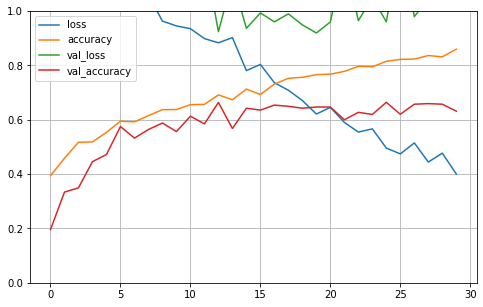

In [109]:
f_accuracy10 = count_accuracy(m10_full)
print(f_accuracy10)
plot_stat(history10_full)

In [110]:
m8_full, history8_full = model8(X_train_full, X_test_full, X_valid_full, y_train_full, y_test_full, y_valid_full)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       5

0.7555555555555555


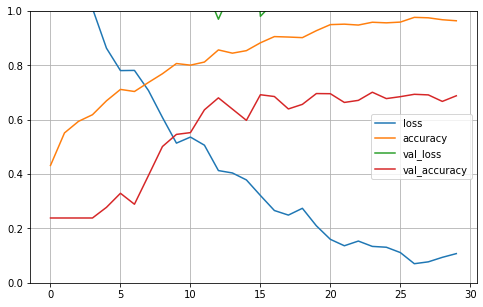

In [111]:
f_accuracy8 = count_accuracy(m8_full)
print(f_accuracy8)
plot_stat(history8_full)

In [112]:
m9_full, history9_full = model9(X_train_full, X_test_full, X_valid_full, y_train_full, y_test_full, y_valid_full)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       5

KeyboardInterrupt: 

In [ ]:
f_accuracy9 = count_accuracy(m9_full)
print(f_accuracy9)
plot_stat(history9_full)